<a href="https://colab.research.google.com/github/panditamey1/nlp_refresher/blob/main/nlp_refresher_2_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade gensim -q
!pip install matplotlib -q


In [2]:
import gensim
import pandas as pd
import numpy as np
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt 
import spacy
import string

In [3]:
gensim.__version__

'4.2.0'

In [4]:
np.random.seed(42)

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/jigsaw-toxic-comment-train.csv")

In [7]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [8]:
wv = api.load("glove-twitter-50")

[==================================================] 100.0% 199.5/199.5MB downloaded


In [9]:
wv['apple']

array([ 5.1418e-01, -1.9196e-01, -7.9963e-01,  9.1339e-01, -5.7061e-01,
        7.1746e-01, -5.8979e-01, -5.1530e-01,  1.3453e+00, -2.0792e-01,
        4.4555e-01,  2.4981e-01, -3.2020e+00,  3.5736e-01, -2.3593e-02,
       -3.1158e-02,  3.7782e-01,  6.4447e-01,  1.2056e+00, -1.0553e-01,
       -8.9697e-01, -7.9754e-01,  2.0239e-01, -1.0664e+00, -4.7167e-01,
       -2.5953e-01,  1.1328e-01, -3.8142e-01,  2.0366e-03, -5.0261e-01,
       -2.5197e-01, -8.4033e-02, -1.0015e+00, -8.6835e-01,  6.6201e-01,
        2.6496e-01,  2.2570e-01, -3.3847e-01, -3.4739e-01,  6.2199e-01,
       -1.3491e+00, -1.7497e-01, -1.1490e+00,  1.5144e-01,  1.1255e+00,
       -6.2668e-01, -3.4274e-01, -3.4938e-01, -1.0806e+00,  6.0174e-01],
      dtype=float32)

In [10]:
len(wv['apple'])

50

In [11]:
wv.similarity("apple","mango")

0.5289788

In [12]:
wv.similarity("apple","car")

0.51229525

In [13]:
pairs = [
    ("car", "minivan"),
    ('car','airplane'),
    ("car","communism")

]
for w1,w2 in pairs:
  print(wv.similarity(w1,w2))

0.48212597
0.6652487
0.006416059


In [14]:
print(wv.most_similar(positive = ['car','minivan'], topn = 5))

[('truck', 0.8638960719108582), ('driving', 0.8150991797447205), ('airplane', 0.8137863278388977), ('parked', 0.8027330636978149), ('drove', 0.8020969033241272)]


In [15]:
wv.most_similar(positive = ['women','king'], negative = ['man'], topn = 5)

[('african', 0.7557350397109985),
 ('royal', 0.7482878565788269),
 ('american', 0.7304849624633789),
 ('heritage', 0.7296820282936096),
 ('white', 0.7148266434669495)]

In [16]:
words = ['one', 'two', 'man','woman','table']

In [17]:
sample_vectors = np.array([wv[word] for word in words])

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.28042245,  1.5896969 ],
       [ 0.59239805,  1.983121  ],
       [-2.5777643 , -1.6972471 ],
       [-1.0547673 , -0.2568552 ],
       [ 3.320554  , -1.6187161 ]], dtype=float32)

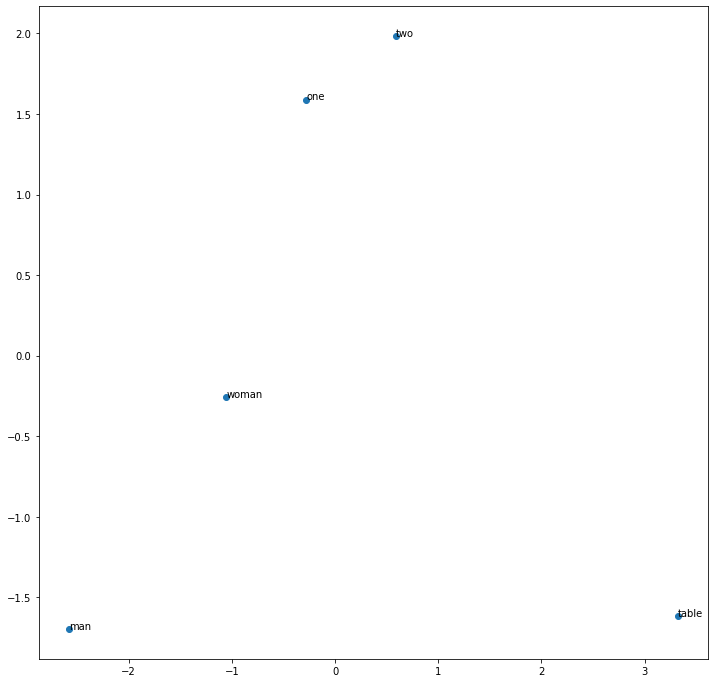

In [20]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0],result[:,1])
for i, word in enumerate(words):
  plt.annotate(word, xy = (result[i,0],result[i,1]))

plt.show()

In [21]:
data = data[:5000]

In [22]:
def sent_vec(sent):
  vector_size = wv.vector_size
  wv_res = np.zeros(vector_size)
  ctr = 1
  for w in sent:
    if w in wv:
      ctr += 1
      wv_res += wv[w]
  wv_res = wv_res/ctr
  return wv_res

In [23]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
#print(stop_words)

def spacy_tokenizer(sentence):
  doc = nlp(sentence)

  tokens = [word.lemma_.lower().strip() for word in doc]

  tokens = [word for word in tokens if word not in stop_words]

  return tokens

In [25]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [27]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, , edit, username, hardcore, meta..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[d'aww, !, match, background, colour, seemingl..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, ,, try, edit, war, ., guy, constant..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"["", , , real, suggestion, improvement, -, wond..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[,, sir, ,, hero, ., chance, remember, page, ?]"


In [28]:
data['vec'] = data['tokens'].apply(sent_vec)

In [29]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tokens,vec
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"[explanation, , edit, username, hardcore, meta...","[0.07215087317551176, 0.11933695773283641, -0...."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[d'aww, !, match, background, colour, seemingl...","[0.24184124246239663, -0.3500204524025321, -0...."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[hey, man, ,, try, edit, war, ., guy, constant...","[0.40671545763810474, 0.1749084067220489, -0.2..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"["", , , real, suggestion, improvement, -, wond...","[0.3578883656134297, 0.016929548965500935, -0...."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[,, sir, ,, hero, ., chance, remember, page, ?]","[0.2818749979138374, -0.2780960023403168, -0.1..."


In [30]:
X = data['vec'].to_list()
y = data['toxic'].to_list()

In [31]:
X[0]

array([ 0.07215087,  0.11933696, -0.32300895,  0.02239731,  0.20129708,
       -0.16669446,  0.66969825, -0.08914979,  0.2432265 ,  0.03057795,
        0.12378671, -0.13282451, -2.50393539, -0.13875675, -0.05739592,
       -0.01113741,  0.03327005,  0.00996309, -0.00264042, -0.08734638,
       -0.15271483, -0.01328233, -0.13272569, -0.19539233, -0.17669008,
       -0.12601416,  0.1777463 ,  0.17389707,  0.03654613,  0.07142591,
        0.03046939,  0.08265646, -0.02978117, -0.26108209,  0.49508147,
       -0.0930845 , -0.01667217, -0.06119075, -0.03816546, -0.18763433,
       -0.46328638,  0.05551613,  0.06681829,  0.01797667, -0.02001917,
       -0.09811571, -0.129141  ,  0.04413581, -0.16909404, -0.21540612])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [36]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [38]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("acc : ", metrics.accuracy_score(y_test, predicted))
print("precision : ", metrics.precision_score(y_test, predicted))
print("recall : ", metrics.recall_score(y_test, predicted))

acc :  0.931
precision :  0.7432432432432432
recall :  0.5238095238095238
